# Esercizio 1 - Wine Quality

## 1. Dimensioni: verifica quante osservazioni (righe) e quante caratteristiche (colonne) compongono il dataset

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

# Configurazione dello stile dei grafici
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Librerie importate con successo!")

# Caricamento del dataset
dataset_path = Path('../dataset/winequality-red.csv')
df = pd.read_csv(dataset_path)

print(f"Dimensioni del dataset: {df.shape}")
print(f"\nColonne: {list(df.columns)}")

✓ Librerie importate con successo!
Dimensioni del dataset: (1599, 12)

Colonne: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Anteprima: osserva le prime righe dei dati per avere un'idea concreta dei valori contenuti

In [24]:
print("\nPrime righe del dataset:")
df.head(10)


Prime righe del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## 3. Tipi e valori mancanti: ispeziona il tipo di dato di ogni colonna (numerico, testuale, ecc.) e controlla se ci sono dati mancanti che potrebbero invalidare l'analisi

In [25]:
# Tipi e valori mancanti
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4. Statistica descrittiva: genera un prospetto che mostri la media, la deviazione standard e i quartili di tutte le variabili numeriche

In [26]:
# Statistiche descrittive
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 5. Target analysis: individua quali sono i punteggi di qualità specifici assegnati ai vini e quanti ce ne sono per ogni categoria

In [27]:
punteggio = df['quality'].value_counts().sort_index()
print(punteggio)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


## 1. Distribuzione della qualità: un grafico a barre per vedere quanti campioni ci sono per ogni punteggio di qualità

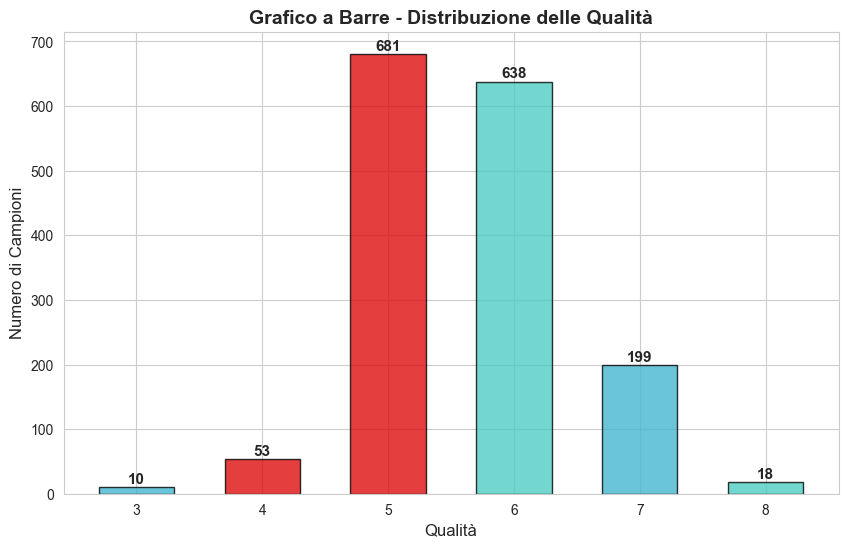

In [28]:
plt.figure(figsize=(10, 6))
species_counts = df['quality'].value_counts()
bars = plt.bar(species_counts.index, species_counts.values, 
               color=["#DF0D0D", '#4ECDC4', '#45B7D1'], 
               edgecolor='black', alpha=0.8, width=0.6)

plt.xlabel('Qualità', fontsize=12)
plt.ylabel('Numero di Campioni', fontsize=12)
plt.title('Grafico a Barre - Distribuzione delle Qualità', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.show()

## 2. Istogramma delle variabili: una griglia di istogrammi per visualizzare la distribuzione di tutte le caratteristiche chimiche

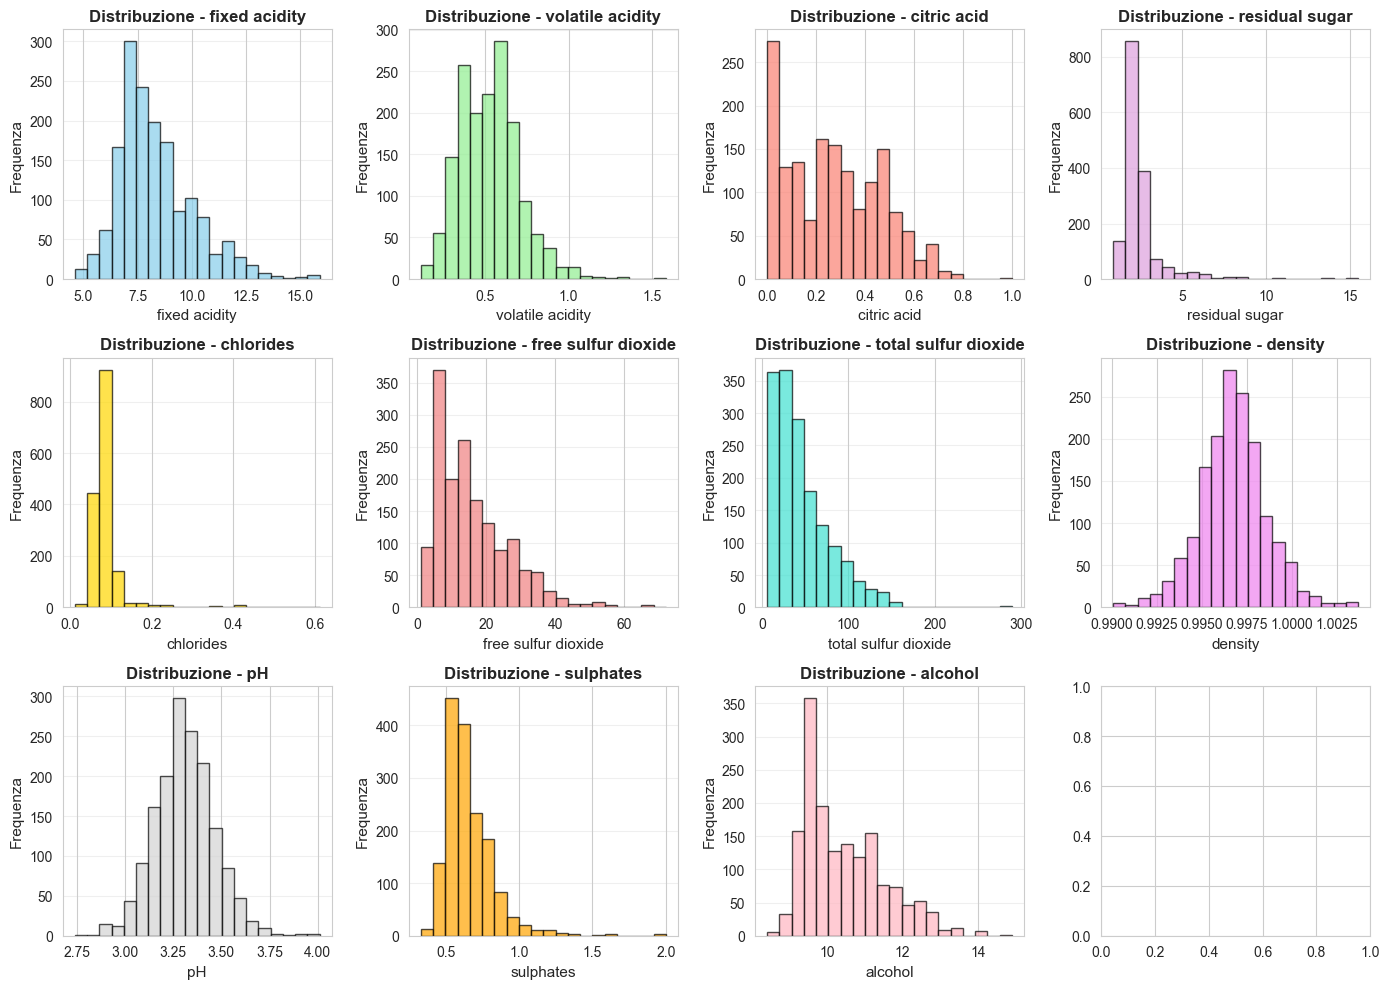

In [29]:
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold', 'lightcoral', 'turquoise', 'violet', 'lightgrey', 'orange', 'lightpink']

for idx, (feature, color) in enumerate(zip(features, colors)):
    ax = axes[idx // 4, idx % 4]
    ax.hist(df[feature], bins=20, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Frequenza', fontsize=11)
    ax.set_title(f'Distribuzione - {feature}', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Heatmap di correlazione: una matrice di correlazione per capire quali variabili influenzano maggiormente la quality

Matrice di Correlazione:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.

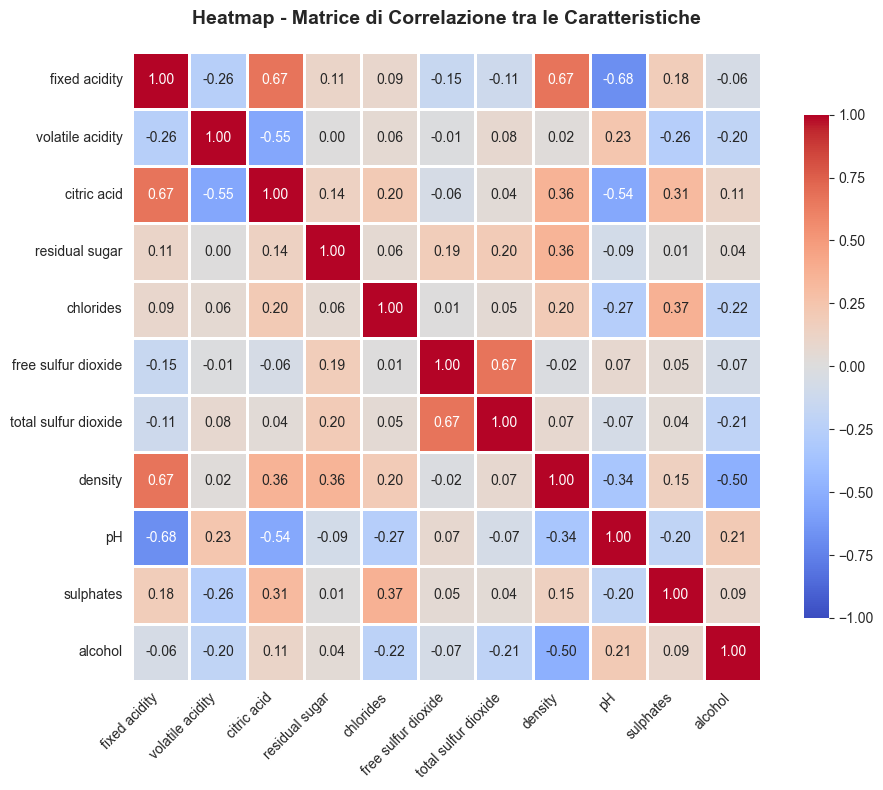

In [30]:
# Calcola la matrice di correlazione
correlation_matrix = df[features].corr()

print("Matrice di Correlazione:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Heatmap - Matrice di Correlazione tra le Caratteristiche', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Boxplot Qualità vs Alcol: per osservare se i vini con gradazione alcolica più alta tendono ad avere una qualità migliore

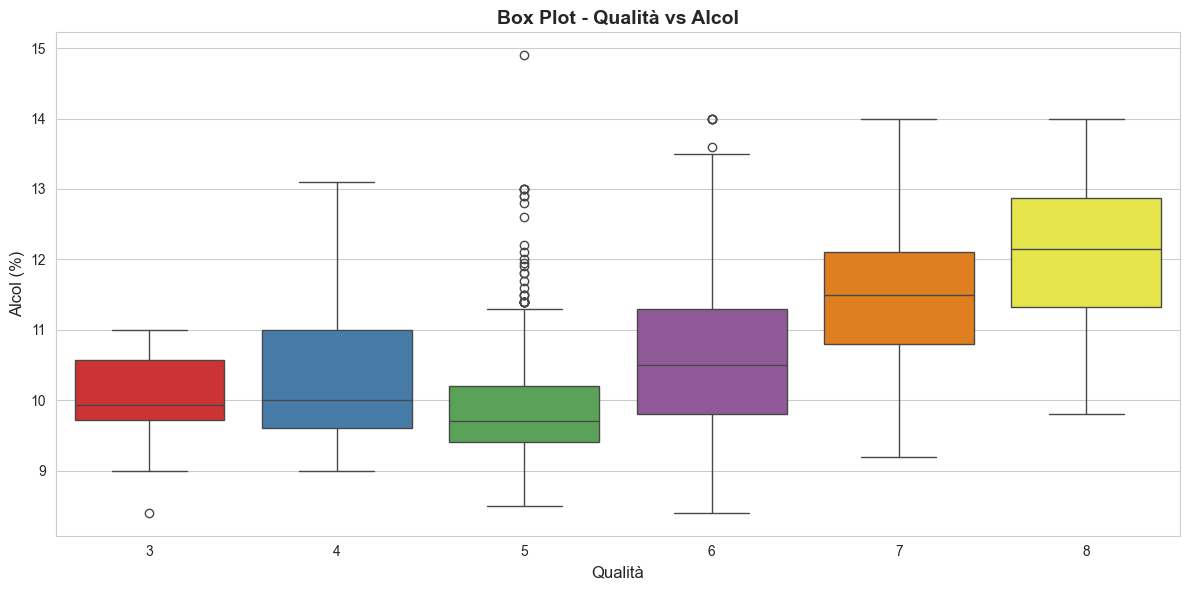

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quality', y='alcohol', palette='Set1')
plt.xlabel('Qualità', fontsize=12)
plt.ylabel('Alcol (%)', fontsize=12)
plt.title('Box Plot - Qualità vs Alcol', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Scatter Plot pH vs Acidità Fissa: per esplorare la relazione chimica tra acidità e pH

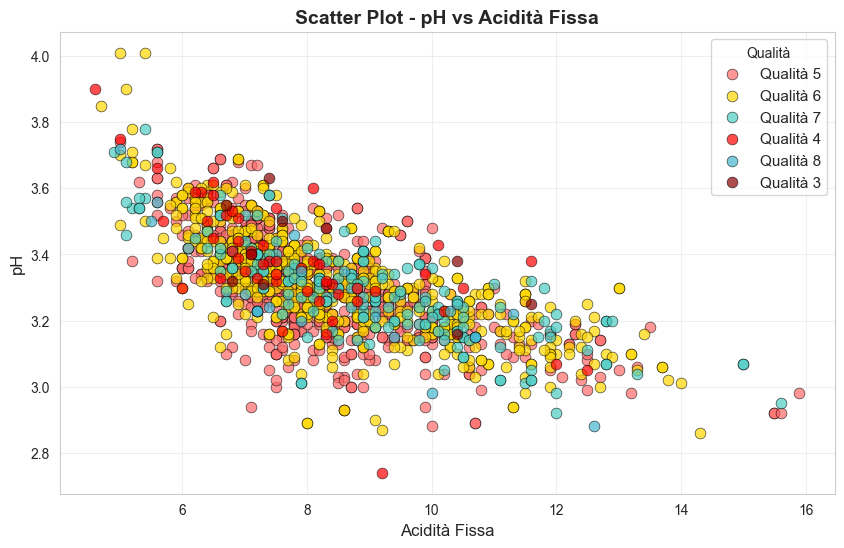

In [32]:
plt.figure(figsize=(10, 6))
colors_map = {3: '#8B0000', 4: '#FF0000', 5: '#FF6B6B', 6: '#FFD700', 7: '#4ECDC4', 8: '#45B7D1'}

for quality in df['quality'].unique():
    subset = df[df['quality'] == quality]
    plt.scatter(subset['fixed acidity'], subset['pH'],
                label=f'Qualità {quality}', alpha=0.7, s=60, edgecolors='black', linewidth=0.5,
                color=colors_map.get(quality, '#999999'))

plt.xlabel('Acidità Fissa', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.title('Scatter Plot - pH vs Acidità Fissa', fontsize=14, fontweight='bold')
plt.legend(title='Qualità', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

## 6. Scatter Plot con regressione (SO2): mettere in relazione free sulfur dioxide e total sulfur dioxide

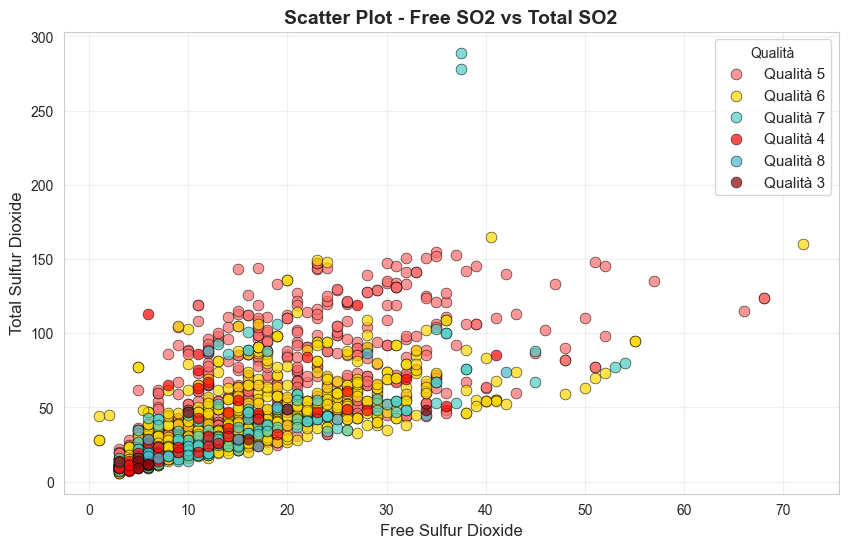

In [33]:
plt.figure(figsize=(10, 6))
colors_map = {3: '#8B0000', 4: '#FF0000', 5: '#FF6B6B', 6: '#FFD700', 7: '#4ECDC4', 8: '#45B7D1'}

for quality in df['quality'].unique():
    subset = df[df['quality'] == quality]
    plt.scatter(subset['free sulfur dioxide'], subset['total sulfur dioxide'],
                label=f'Qualità {quality}', alpha=0.7, s=60, edgecolors='black', linewidth=0.5,
                color=colors_map.get(quality, '#999999'))

plt.xlabel('Free Sulfur Dioxide', fontsize=12)
plt.ylabel('Total Sulfur Dioxide', fontsize=12)
plt.title('Scatter Plot - Free SO2 vs Total SO2', fontsize=14, fontweight='bold')
plt.legend(title='Qualità', fontsize=11)
plt.grid(alpha=0.3)
plt.show()

## 7. Facet Grid di istogrammi: visualizzare la distribuzione dell'acidità volatile per ogni livello di qualità

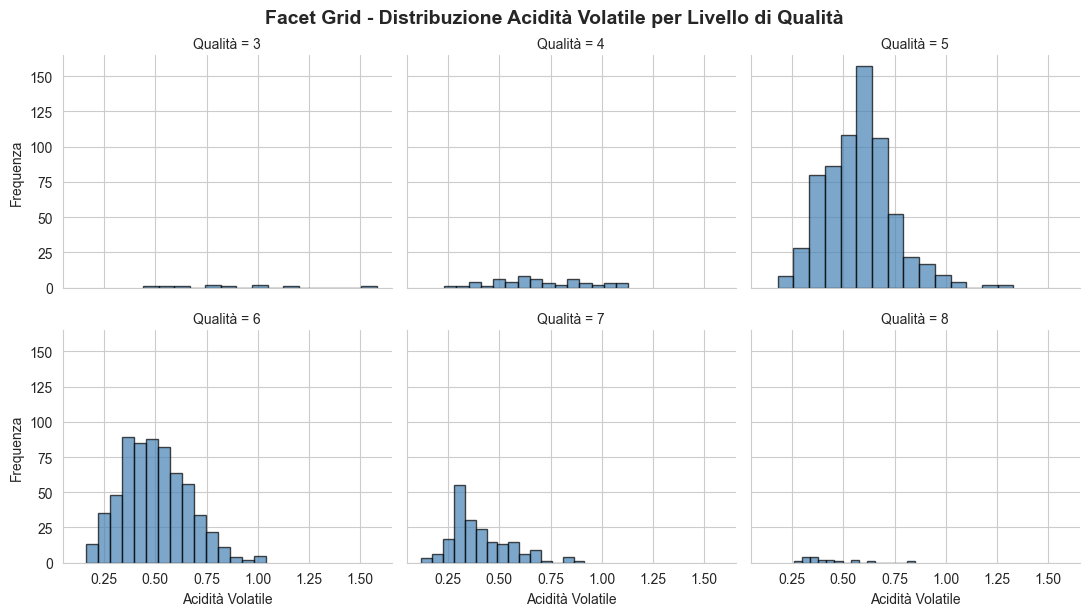

In [34]:
g = sns.FacetGrid(df, col='quality', col_wrap=3, height=3, aspect=1.2)
g.map(plt.hist, 'volatile acidity', bins=15, color='steelblue', edgecolor='black', alpha=0.7)
g.set_axis_labels('Acidità Volatile', 'Frequenza')
g.set_titles('Qualità = {col_name}')
g.figure.suptitle('Facet Grid - Distribuzione Acidità Volatile per Livello di Qualità', fontsize=14, fontweight='bold', y=1.02)
plt.show()





## PREPROCESSING




# CONTROLLO VALORI MANCANTI

In [35]:
# Controllo dei valori mancanti (incluso '?')
print("Valori mancanti per colonna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Valori mancanti per colonna:
Series([], dtype: int64)


# SEPARAZIONE FEATURE E TARGET

In [36]:
# Separazione delle feature e del target
X = df.drop('quality', axis=1)
y = df['quality']

print(f"Shape delle feature (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")
print(f"\nDistribuzione del target:")
print(y.value_counts())

Shape delle feature (X): (1599, 11)
Shape del target (y): (1599,)

Distribuzione del target:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


# SUDDIVISIONE IN TRAIN E TEST SET

In [37]:
# Split train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Manteniamo la stessa proporzione delle classi
)


print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")
print(f"\nDistribuzione delle classi nel training set:")
print(y_train.value_counts())
print(f"\nDistribuzione delle classi nel test set:")
print(y_test.value_counts())



Dimensioni del training set: (1279, 11)
Dimensioni del test set: (320, 11)

Distribuzione delle classi nel training set:
quality
5    545
6    510
7    159
4     42
8     15
3      8
Name: count, dtype: int64

Distribuzione delle classi nel test set:
quality
5    136
6    128
7     40
4     11
8      3
3      2
Name: count, dtype: int64


# NORMALIZZAZIONE FEATURE

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CLASSIC ML

## SVR

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prepariamo i dizionari dei parametri
# ---------------------------------------------------------

# 1. Parametri SVR
param_svr = {
    'C': uniform(0.1, 20),
    'epsilon': uniform(0.01, 1),
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto']
}
svr = SVR()

random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_svr, cv=5, verbose=True)
random_search_svr.fit(X_train_scaled, y_train)


# This assigns the actual model with the best parameters to 'best_svr'




print("best accuracy", random_search_svr.best_score_)
print(random_search_svr.best_estimator_)

best_svr = random_search_svr.best_params_





Fitting 5 folds for each of 10 candidates, totalling 50 fits
best accuracy 0.3713157228947086
SVR(C=np.float64(3.4358452963522845), epsilon=np.float64(0.4615817848180024),
    gamma='auto')


## DECISION TREE


In [40]:
# 2. Parametri Decision Tree
param_tree = {

    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': randint(2, 11),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

random_search_tree = RandomizedSearchCV(estimator=tree, param_distributions=param_tree, cv=5, verbose=True)
random_search_tree.fit(X_train_scaled, y_train)

print("best accuracy",random_search_tree.best_score_)
print(random_search_tree.best_estimator_)

best_tree = random_search_tree.best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
best accuracy 0.5895251225490197
DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=3,
                       random_state=1)


## ADA BOOST

In [41]:
# 3. Parametri AdaBoost
param_ada = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 2.0),

}

ada = AdaBoostClassifier()

random_search_ada = RandomizedSearchCV(estimator=ada, param_distributions=param_ada, cv=5, verbose=True)
random_search_ada.fit(X_train_scaled, y_train)

print("best accuracy",random_search_ada.best_score_)
print(random_search_ada.best_estimator_)


best_ada = random_search_ada.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best accuracy 0.5785753676470587
AdaBoostClassifier(learning_rate=np.float64(0.12304314465784859),
                   n_estimators=261)


# controllo risultati

## svr

MAE: 0.5016
RMSE: 0.6210
R2 Score: 0.4024


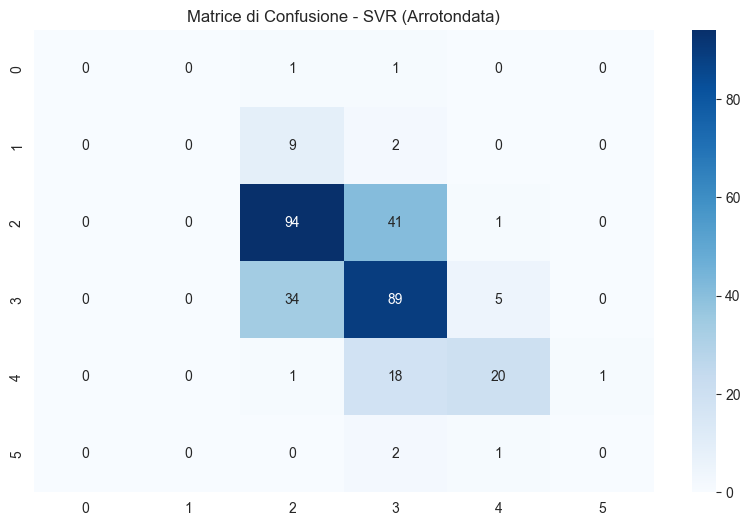

In [42]:



# 1. Support Vector Regression (SVR)
svr = SVR(**best_svr)
svr.fit(X_train_scaled, y_train)

# Predict continuous values
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation Metrics for Regression
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")



# Arrotonda le predizioni SVR per renderle "classi"
svr_preds_rounded = np.round(y_pred_svr)

# Genera la matrice
cm_svr = confusion_matrix(y_test, svr_preds_rounded)

# Visualizza
sns.heatmap(cm_svr, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - SVR (Arrotondata)')
plt.show()






## tree

Best hyper:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 3}


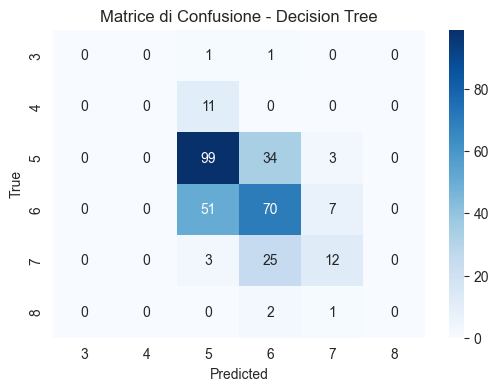

In [43]:
print("Best hyper: ", best_tree)

dt = DecisionTreeClassifier(**best_tree)
dt= dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
acc_dt = accuracy_score(y_test, y_pred_dt)

#matrice di confusione
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Use unique values for labels
labels = sorted(df['quality'].unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - Decision Tree')
plt.show()

## adaboost

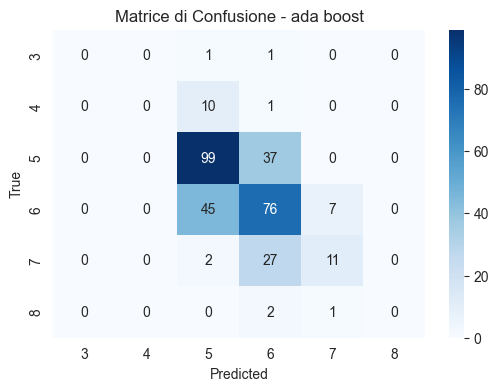

In [44]:
ada = AdaBoostClassifier(**best_ada)
ada.fit(X_train_scaled, y_train)

# Predict continuous values
y_pred_ada = ada.predict(X_test_scaled)

#matrice di confusione
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Use unique values for labels
labels = sorted(df['quality'].unique())

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione - ada boost')
plt.show()
